In [48]:
import pandas as pd
import matplotlib.pyplot as plt

#importing the clean data

data_df = pd.read_csv("./Data_set/clean_spotify_youtube.csv")
data_df.head()

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Tempo,Duration_ms,Title,Channel,Views,Likes,Comments,Licensed,official_video,Stream
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,6.0,-6.679,0.1770,0.008360,...,138.559,222640.0,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,True,True,1.040235e+09
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,0.703,8.0,-5.815,0.0302,0.086900,...,92.761,200173.0,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,True,True,3.100837e+08
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.695,0.923,1.0,-3.930,0.0522,0.042500,...,108.014,215150.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,True,True,6.306347e+07
3,Gorillaz,On Melancholy Hill,Plastic Beach,album,0.689,0.739,2.0,-5.810,0.0260,0.000015,...,120.423,233867.0,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,True,True,4.346636e+08
4,Gorillaz,Clint Eastwood,Gorillaz,album,0.663,0.694,10.0,-8.627,0.1710,0.025300,...,167.953,340920.0,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,True,True,6.172597e+08


In [49]:
#splitting the data into groups that takes out rows that don't have the relevante data (i.e. spotify_df drops anything with a NaN in the streams column)
spotify_df = data_df.dropna(subset=["Stream","Danceability"])

spotify_sample = spotify_df.sample(n = 1000)

youtube_df = data_df.dropna(subset=["Views","Danceability"])

youtube_sample = youtube_df.sample(n= 1000)

combo_df = data_df.dropna(subset=["Stream","Views","Danceability"])

combo_sample = combo_df.sample(n=1000)

In [50]:
#defines a funtion that will end up outputting a plot for youtube data
def youtube_plotting(x):
    plt.scatter(youtube_sample[x],youtube_sample["Views"],color="blue",edgecolors="black")
    plt.xlabel(x,fontdict = {"fontsize":15})
    plt.ylabel("Views (Scientific Notation)",fontdict = {"fontsize":15})
    plt.title(f"{x} vs. Views",fontdict = {"fontsize":18})
    plt.tight_layout()
    plt.savefig(f"./Data_set/numerical_fig{x}vsViews.png")
    plt.show()
    

In [51]:
#defines a funtion that will end up outputting a plot for youtube data
def spotify_plotting(x):
    plt.scatter(spotify_sample[x],spotify_sample["Stream"],color="r",edgecolors="black")
    plt.xlabel(x,fontdict = {"fontsize":15})
    plt.ylabel("Streams (Scientific Notation)",fontdict = {"fontsize":15})
    plt.title(f"{x} vs. Streams",fontdict = {"fontsize":18})
    plt.tight_layout()
    plt.savefig(f"./Data_set/numerical_fig{x}vsStream.png")
    plt.show()
    

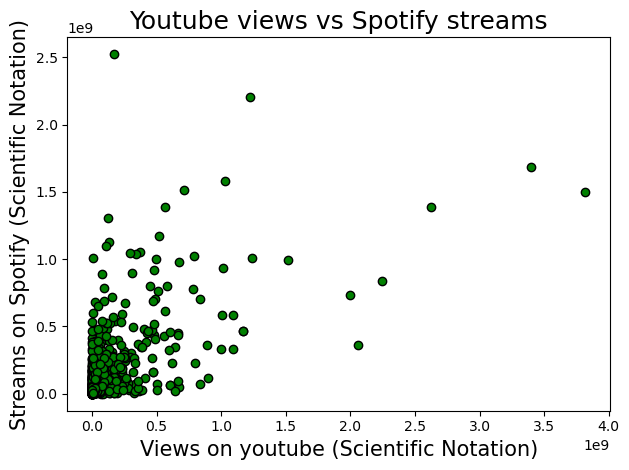

In [52]:
#Plots Youtube views vs Spotify Streams to see if there are many that do well in both or not
plt.scatter(combo_sample["Views"],combo_sample["Stream"],color = "g", edgecolors="black")
plt.xlabel("Views on youtube (Scientific Notation)",fontdict = {"fontsize":15})
plt.ylabel("Streams on Spotify (Scientific Notation)",fontdict = {"fontsize":15})
plt.title("Youtube views vs Spotify streams",fontdict = {"fontsize":18})
plt.tight_layout()
plt.show()

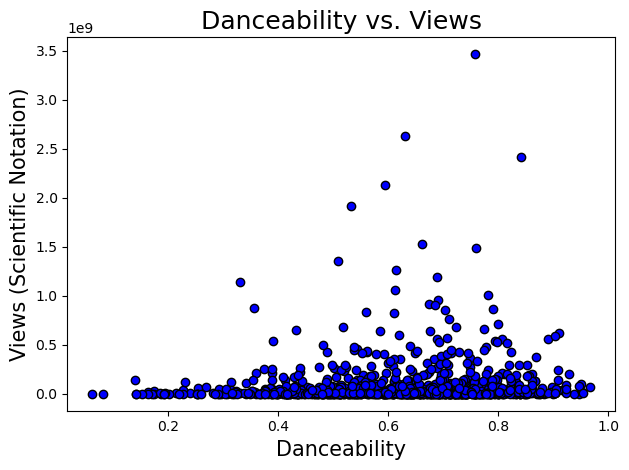

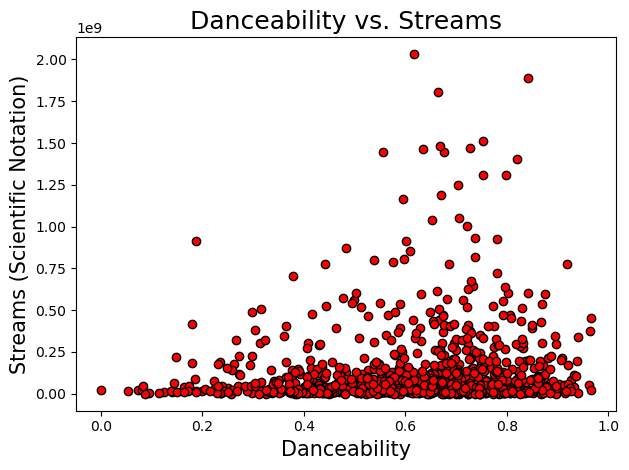

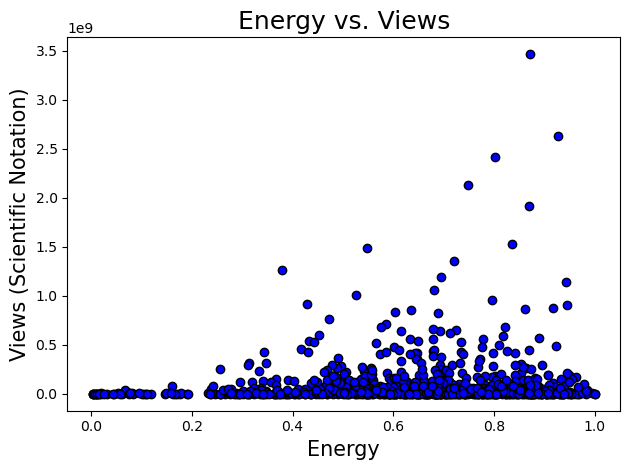

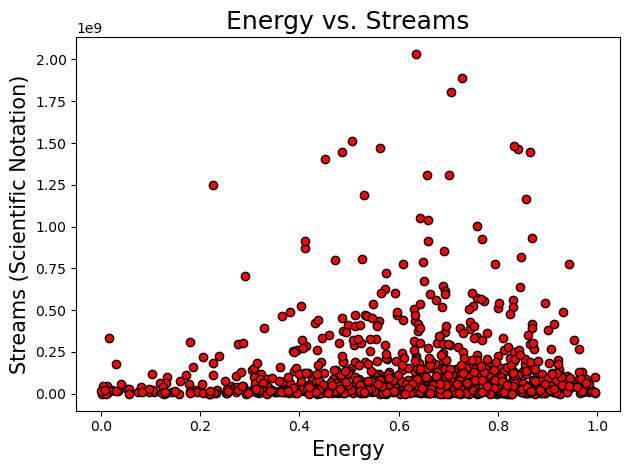

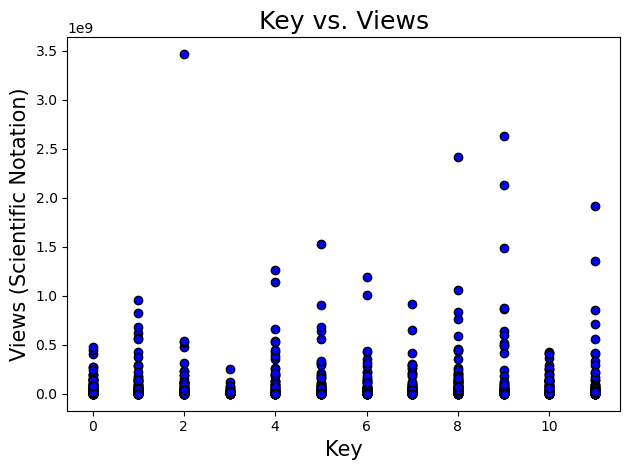

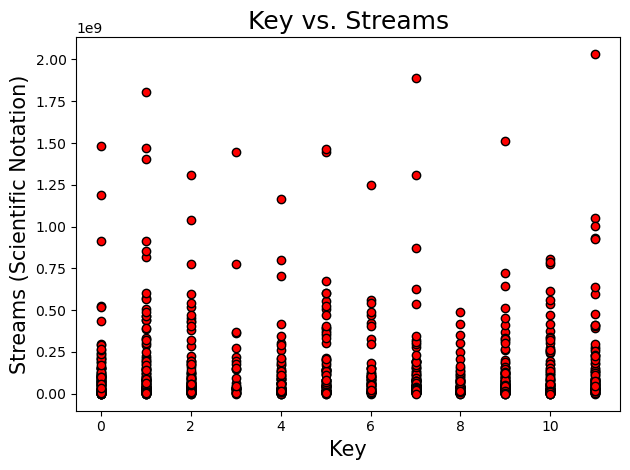

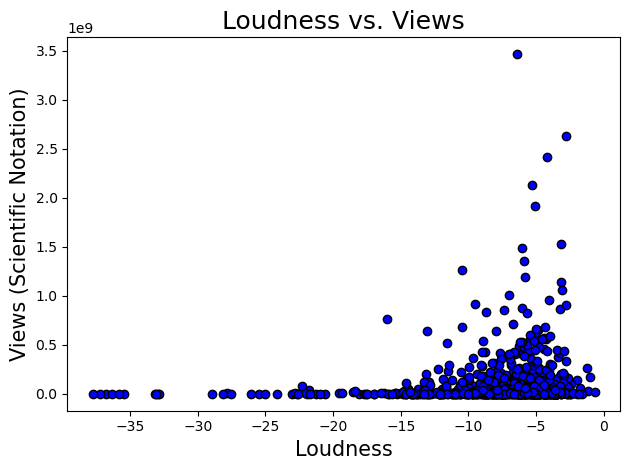

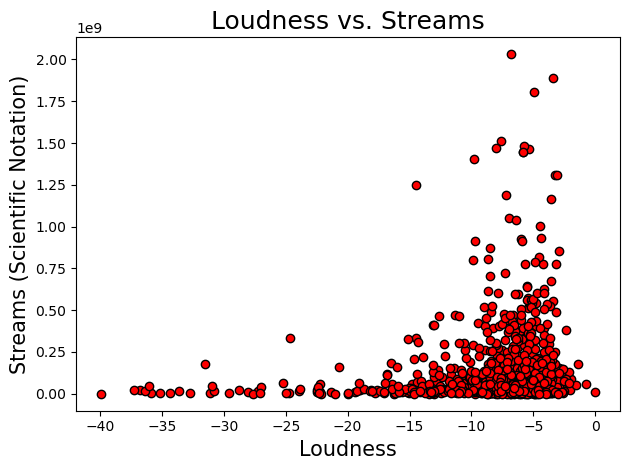

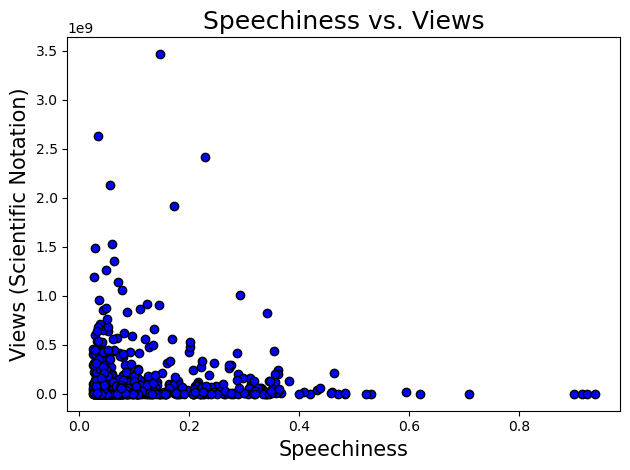

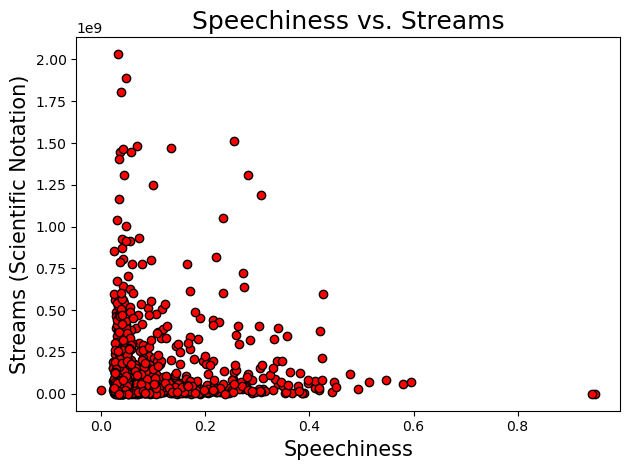

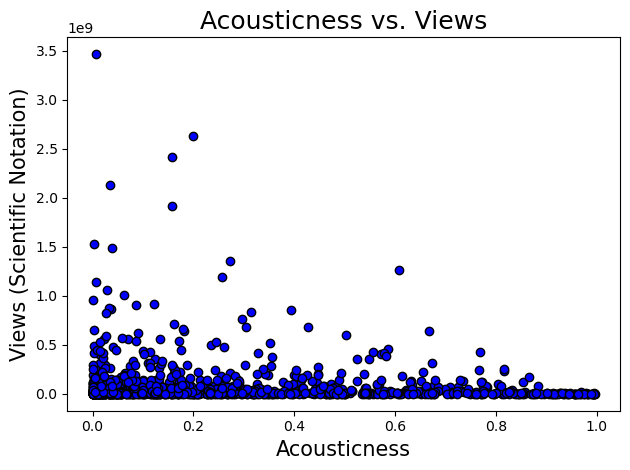

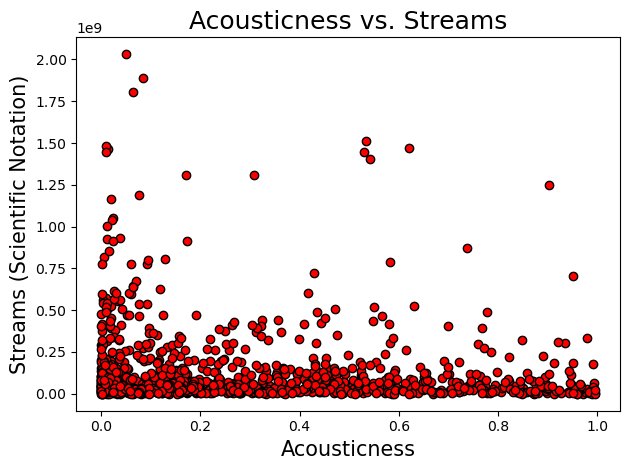

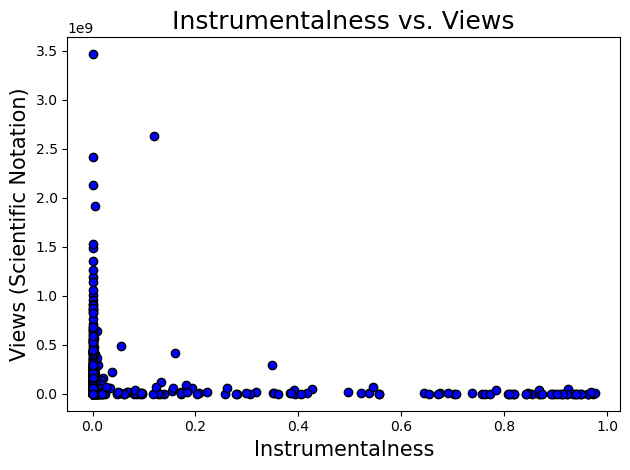

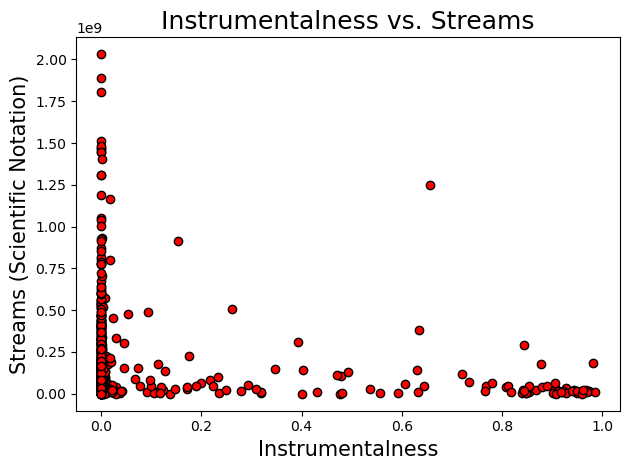

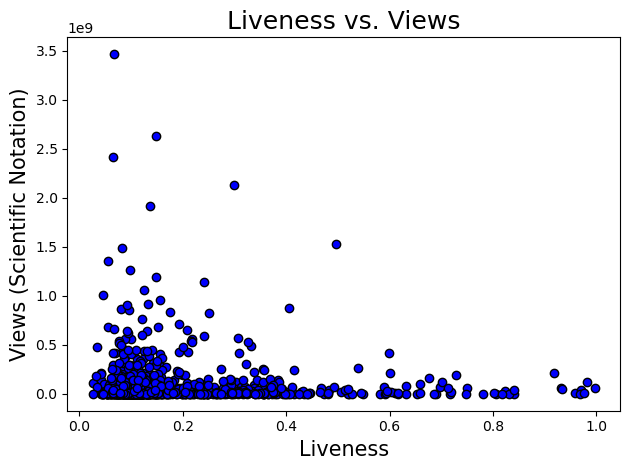

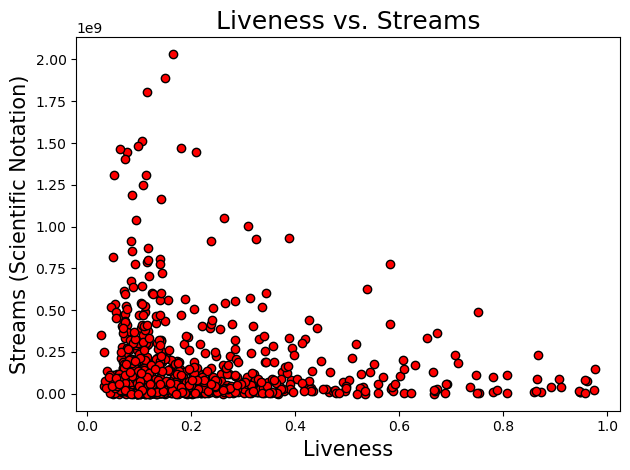

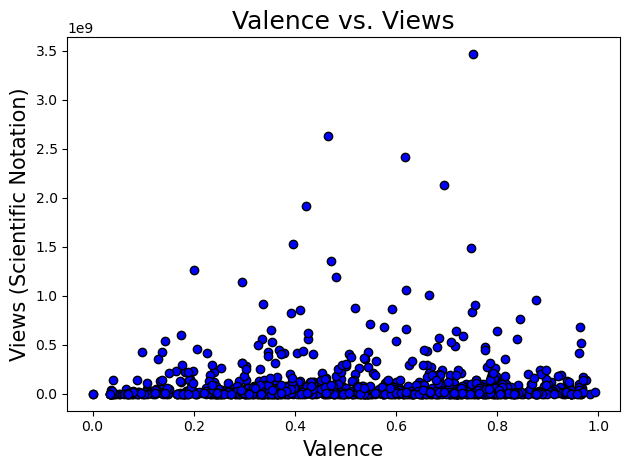

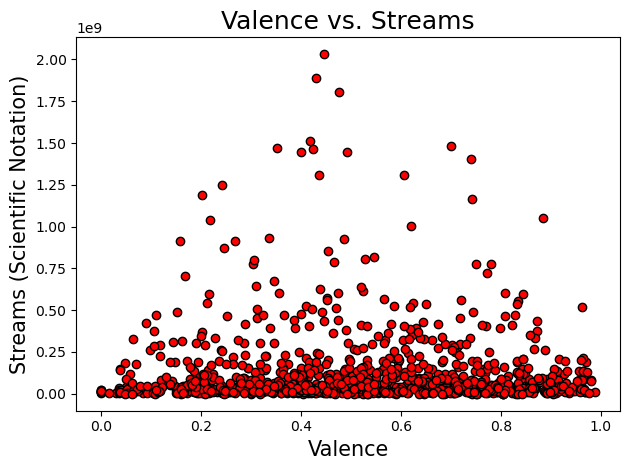

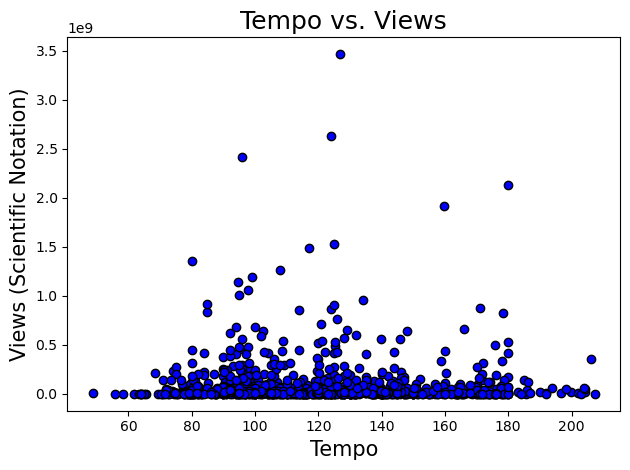

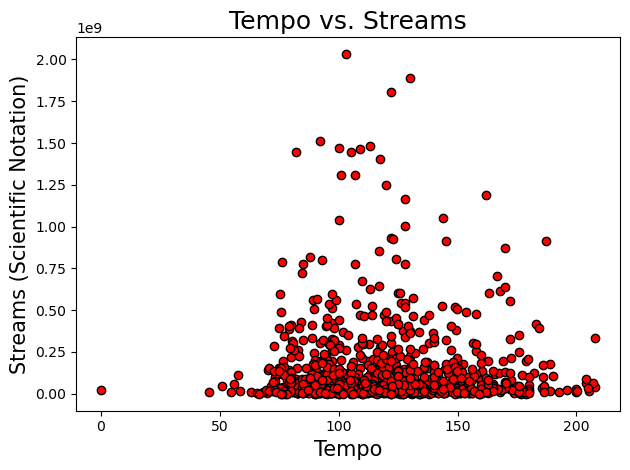

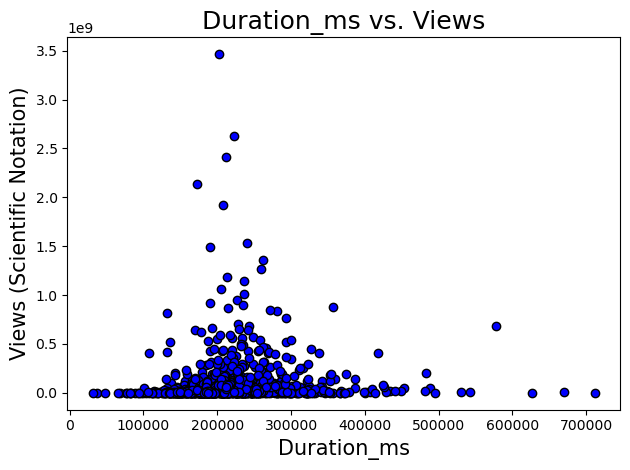

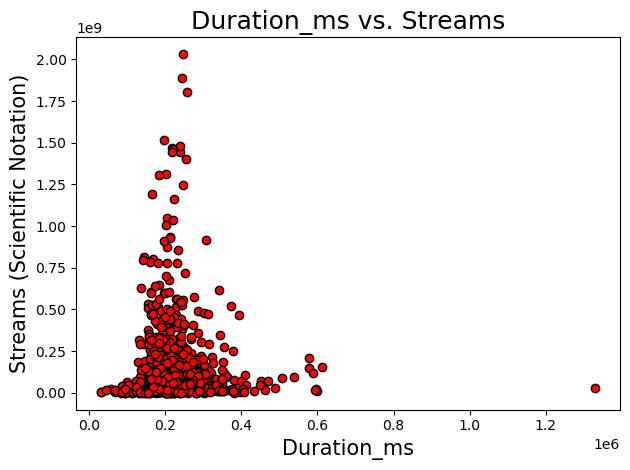

In [53]:
#indicates which variables we're going to plot against the youtube and spotify data
variables = ['Danceability','Energy','Key','Loudness','Speechiness','Acousticness','Instrumentalness','Liveness','Valence','Tempo','Duration_ms']
#produces all the scatter plots (blue is youtube, red is spotify)
for a in variables:
    youtube_plotting(a)
    spotify_plotting(a)

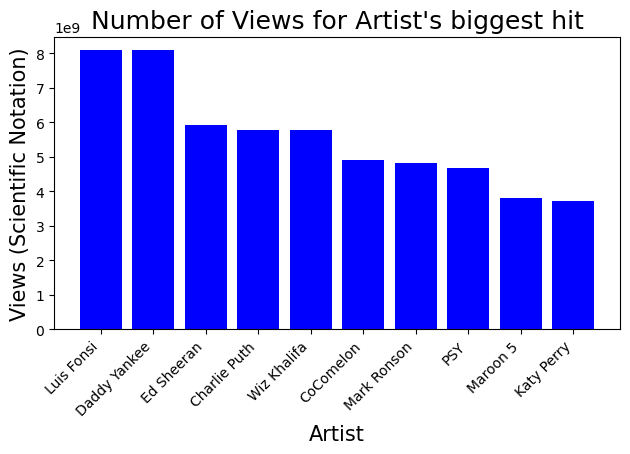

         Artist         Views
0    Luis Fonsi  8.079649e+09
1  Daddy Yankee  8.079647e+09
2    Ed Sheeran  5.908398e+09
3  Charlie Puth  5.773798e+09
4   Wiz Khalifa  5.773797e+09
5     CoComelon  4.898831e+09
6   Mark Ronson  4.821016e+09
7           PSY  4.679767e+09
8      Maroon 5  3.817733e+09
9    Katy Perry  3.725749e+09


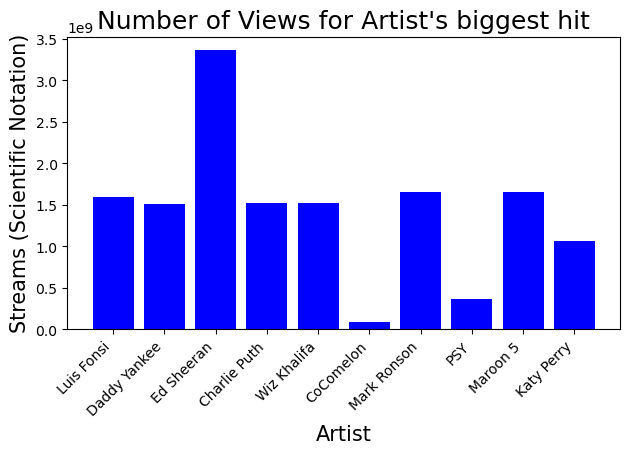

         Artist         Views
0    Luis Fonsi  8.079649e+09
1  Daddy Yankee  8.079647e+09
2    Ed Sheeran  5.908398e+09
3  Charlie Puth  5.773798e+09
4   Wiz Khalifa  5.773797e+09
5     CoComelon  4.898831e+09
6   Mark Ronson  4.821016e+09
7           PSY  4.679767e+09
8      Maroon 5  3.817733e+09
9    Katy Perry  3.725749e+09


In [58]:
#this plots the top 10 artists based on Views on youtube based on their top rated song and how it performed on youtube
max_views_df = data_df.groupby("Artist").max("Views")
max_views_df = max_views_df.sort_values("Views",ascending=False).head(10).reset_index()
plt.bar(max_views_df["Artist"],max_views_df["Views"],color="blue")
plt.xlabel("Artist",fontdict = {"fontsize":15})
plt.ylabel("Views (Scientific Notation)",fontdict = {"fontsize":15})
plt.xticks(ha = "right",rotation = 45)
plt.title("Number of Views for Artist's biggest hit",fontdict = {"fontsize":18})
plt.tight_layout()
plt.show()
print(max_views_df[["Artist","Views"]])
#this plot shows the top 10 artists based on Views and how those songs did on spotify (chosen for youtube data, ranked by spotify data)
plt.bar(max_views_df["Artist"],max_views_df["Stream"],color="blue")
plt.xlabel("Artist",fontdict = {"fontsize":15})
plt.ylabel("Streams (Scientific Notation)",fontdict = {"fontsize":15})
plt.xticks(ha = "right",rotation = 45)
plt.title("Number of Views for Artist's biggest hit",fontdict = {"fontsize":18})
plt.tight_layout()
plt.show()
print(max_views_df[["Artist","Views"]])

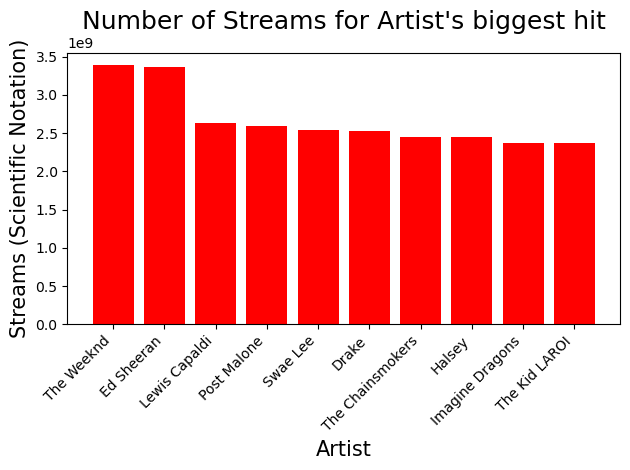

             Artist        Stream
0        The Weeknd  3.386520e+09
1        Ed Sheeran  3.362005e+09
2     Lewis Capaldi  2.634013e+09
3       Post Malone  2.594927e+09
4          Swae Lee  2.538330e+09
5             Drake  2.522432e+09
6  The Chainsmokers  2.456205e+09
7            Halsey  2.456205e+09
8   Imagine Dragons  2.369272e+09
9     The Kid LAROI  2.365778e+09


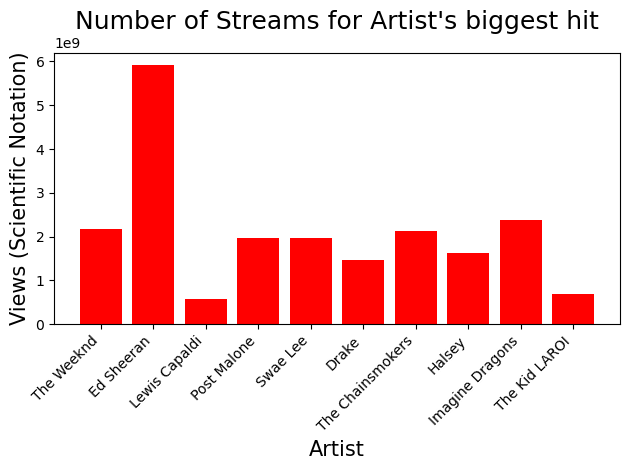

In [59]:
#this plots the top 10 artists based on Streams on spotify based on their top rated song and how it performed on spotify
max_streams_df = data_df.groupby("Artist").max("Stream")
max_streams_df = max_streams_df.sort_values("Stream",ascending=False).head(10).reset_index()
plt.bar(max_streams_df["Artist"],max_streams_df["Stream"],color = "red")
plt.xlabel("Artist",fontdict = {"fontsize":15})
plt.ylabel("Streams (Scientific Notation)",fontdict = {"fontsize":15})
plt.xticks(ha = "right",rotation = 45)
plt.title("Number of Streams for Artist's biggest hit",fontdict = {"fontsize":18})
plt.tight_layout()
plt.show()
print(max_streams_df[["Artist","Stream"]])
#this plot shows the top 10 artists based on Streams and how those songs did on youtube (chosen for spotify data, ranked by youtube data)
plt.bar(max_streams_df["Artist"],max_streams_df["Views"],color = "red")
plt.xlabel("Artist",fontdict = {"fontsize":15})
plt.ylabel("Views (Scientific Notation)",fontdict = {"fontsize":15})
plt.xticks(ha = "right",rotation = 45)
plt.title("Number of Streams for Artist's biggest hit",fontdict = {"fontsize":18})
plt.tight_layout()
plt.show()

In [66]:
# temp_data = data_df.groupby("Track").sum("Views")
# temp_data = temp_data[temp_data]
# temp_data.head(10).sort_values("Views",ascending=False)

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Tempo,Duration_ms,Title,Channel,Views,Likes,Comments,Licensed,official_video,Stream
17938,Post Malone,Sunflower - Spider-Man: Into the Spider-Verse,Hollywood's Bleeding,album,0.755,0.522,2.0,-4.368,0.0575,0.5330,...,89.960,157560.0,"Post Malone, Swae Lee - Sunflower (Spider-Man:...",PostMaloneVEVO,1.977389e+09,13749813.0,331063.0,True,True,2.538330e+09
17939,Post Malone,Congratulations,Stoney (Deluxe),album,0.630,0.804,6.0,-4.183,0.0363,0.2150,...,123.146,220293.0,Post Malone - Congratulations ft. Quavo,PostMaloneVEVO,1.490857e+09,9065248.0,266784.0,True,True,1.685298e+09
17937,Post Malone,rockstar (feat. 21 Savage),beerbongs & bentleys,album,0.585,0.520,5.0,-6.136,0.0712,0.1240,...,159.801,218147.0,Post Malone ft. 21 Savage - rockstar (Official...,PostMaloneVEVO,1.060220e+09,12564657.0,366520.0,True,True,2.594927e+09
17941,Post Malone,Better Now,beerbongs & bentleys,album,0.680,0.578,10.0,-5.804,0.0400,0.3310,...,145.038,231267.0,Post Malone - Better Now,PostMaloneVEVO,5.573330e+08,4303699.0,67469.0,True,True,1.694008e+09
17936,Post Malone,Circles,Hollywood's Bleeding,album,0.695,0.762,0.0,-3.497,0.0395,0.1920,...,120.042,215280.0,Post Malone - Circles,PostMaloneVEVO,5.420168e+08,4778234.0,117235.0,True,True,1.958827e+09
17942,Post Malone,Goodbyes (feat. Young Thug),Hollywood's Bleeding,album,0.548,0.653,5.0,-3.875,0.0810,0.4560,...,150.068,174853.0,"Post Malone - ""Goodbyes"" ft. Young Thug (Rated R)",PostMaloneVEVO,3.047763e+08,4245512.0,128345.0,True,True,1.072286e+09
17940,Post Malone,Wow.,Hollywood's Bleeding,album,0.829,0.539,11.0,-7.359,0.2080,0.1360,...,99.960,149547.0,"Post Malone - ""Wow."" (Official Music Video)",Post Malone,2.990456e+08,2796960.0,47088.0,False,True,1.385120e+09
17943,Post Malone,One Right Now (with The Weeknd),Twelve Carat Toothache,album,0.682,0.764,1.0,-5.411,0.0477,0.0363,...,97.023,192721.0,"Post Malone, The Weeknd - One Right Now",PostMaloneVEVO,9.033165e+07,1280736.0,29053.0,True,True,4.553974e+08
17935,Post Malone,I Like You (A Happier Song) (with Doja Cat),Twelve Carat Toothache,album,0.733,0.670,5.0,-6.009,0.0751,0.1210,...,100.964,192841.0,Post Malone - I Like You (A Happier Song) w. D...,PostMaloneVEVO,7.039975e+07,1166602.0,20239.0,True,True,4.330874e+08
17944,Post Malone,I Fall Apart,Stoney (Deluxe),album,0.556,0.538,8.0,-5.408,0.0382,0.0689,...,143.950,223347.0,Post Malone – I Fall Apart (Music Video),HipHop Sounds,2.050936e+06,23283.0,483.0,False,False,1.433984e+09
